<a href="https://colab.research.google.com/github/angiecoronel12/Sleep_Stage/blob/main/3_Partici%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. **Data preparation: Multivariate Time Series**

Este sera un problema en el cual cada una de las observaciones de entrada tendra varias series (un vector de 33 caracteristicas). Se usarán los ultimos 10 instantes (t-10) traducidos en 300 caracteristicas a partir de los cuales se busca predecir el valor de una etiqueta (externa a la señal) en el instante t. Se tienen un total de 20 sujetos de los cuales 16 se usarán en el entrenamiento, y los 4 restantes se usarán para la predicción del modelo.

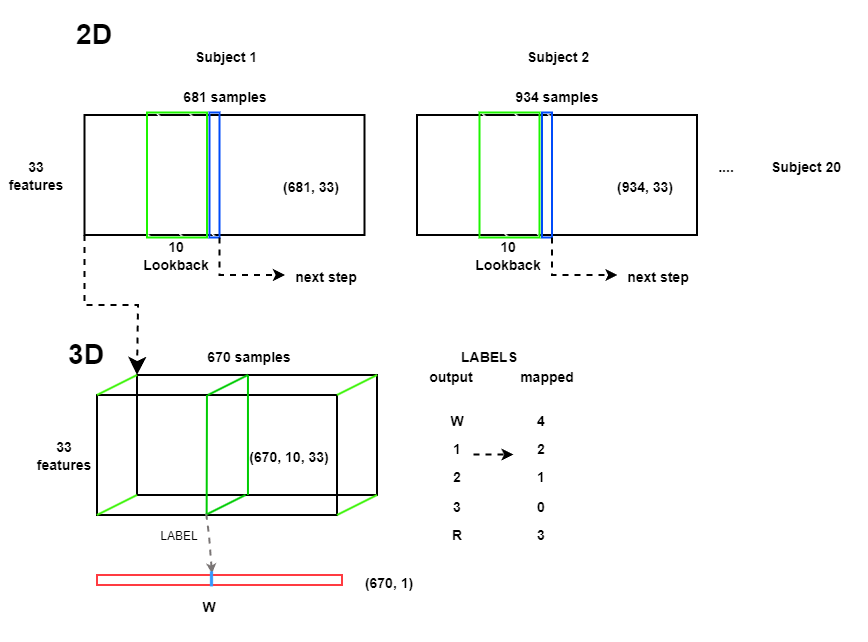**

In [ ]:
# carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# importa los dataframes
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# La ruta al archivo HDF5 de los datos preprocesados en el anterior notebook
hdf5_file_path = '/content/drive/My Drive/Deep_learning_proyecto/Signals_10_subjects/data_process_2.h5'

# Leer los DataFrames
data_frames = []
with pd.HDFStore(hdf5_file_path) as store:
    for i in range(20):
        df = store.get(f'df{i+1}')
        data_frames.append(df)

In [ ]:
print(f'Número de DataFrames en la lista: {len(data_frames)}')

Número de DataFrames en la lista: 20


In [ ]:
# Sujeto de prueba
data_s1 = data_frames[0]

In [ ]:
matrices_de_datos = {}

# Generar matrices de datos y almacenarlas en el diccionario
for i, df in enumerate(data_frames):
    matriz = df[data_s1.columns].values  # Extrae la matriz de datos
    matrices_de_datos[f'matriz_{i+1}'] = matriz

**Reformateo de los datos de cada sujeto de forma individual, se escalan y luego se dividen en train y test**

In [ ]:
def create_datasetMV_TimesAhead(dataset, look_back, n_steps_ahead):
    X, Y = [],[];
    for i in range (len(dataset) - look_back - n_steps_ahead):
        x = dataset[i: i + look_back,:-1]
        X.append(x)
        y = dataset[i + look_back: i + look_back + n_steps_ahead,-1] # Necesito la ultima columna -1 que es el Hipnograma
        Y.append(y)

    # Convert lists to NumPy arrays
    dataX = np.array(X)
    dataY = np.array(Y, dtype=str)

    return dataX, dataY

In [ ]:
# Ejemplo de prueba con el primer sujeto
primera_matriz = matrices_de_datos['matriz_1']
XX, YY = create_datasetMV_TimesAhead(primera_matriz, 10, 1)
print(XX.shape)
print(YY.shape)

(670, 10, 33)
(670, 1)


In [ ]:
def Data_preparation(MVSeries, look_back, n_steps_ahead, create_datasetMV_TimesAhead):
    # Extraer los nombres de las claves en el diccionario
    subjects = list(MVSeries.keys())

    # Separar los sujetos en entrenamiento y prueba
    train_subjects = subjects[:16]
    print(len(train_subjects))
    test_subjects = subjects[16:]
    print(len(test_subjects))

    # Crear listas para almacenar los conjuntos de datos de entrenamiento y prueba
    X_train_list, y_train_list = [], []
    X_test_list, y_test_list = [], []

    # Normalizar y preparar datos de entrenamiento
    for subject in train_subjects:
        data = MVSeries[subject]
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_normalized = scaler.fit_transform(data[:,:-1])
        data_normalized = np.concatenate((X_normalized, data[:, -1].reshape(-1, 1)), axis=1)

        # Crear el dataset de las series de tiempo
        X, y = create_datasetMV_TimesAhead(data_normalized, look_back, n_steps_ahead)
        print(X.shape)
        print(y.shape)

        X_train_list.append(X)
        y_train_list.append(y)

    # Normalizar y preparar datos de prueba
    for subject in test_subjects:
        data = MVSeries[subject]
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_normalized = scaler.fit_transform(data[:,:-1])
        data_normalized = np.concatenate((X_normalized, data[:, -1].reshape(-1, 1)), axis=1)

        X, y = create_datasetMV_TimesAhead(data_normalized, look_back, n_steps_ahead)
        print(X.shape)
        print(y.shape)

        X_test_list.append(X)
        y_test_list.append(y)

    # Concatenar todos los datos de entrenamiento y prueba
    X_train = np.concatenate(X_train_list, axis=0)
    y_train = np.concatenate(y_train_list, axis=0)
    X_test = np.concatenate(X_test_list, axis=0)
    y_test = np.concatenate(y_test_list, axis=0)

    print(f'datos train: {X_train.shape}')
    print(f'datos test: {X_test.shape}')
    print(f'Valor total de los datos: {(X_train.shape[0]+X_test.shape[0])}')

    return X_train, y_train, X_test, y_test, scaler

**Visualizamos la estructura de cada sujeto**

In [ ]:
# Llamamos la función para el reformateo de los datos
look_back, n_steps_ahead = 10, 1
X_train, y_train, X_test, y_test,scaler = Data_preparation(matrices_de_datos,look_back,n_steps_ahead,create_datasetMV_TimesAhead)

16
4
(670, 10, 33)
(670, 1)
(923, 10, 33)
(923, 1)
(928, 10, 33)
(928, 1)
(989, 10, 33)
(989, 1)
(829, 10, 33)
(829, 1)
(837, 10, 33)
(837, 1)
(778, 10, 33)
(778, 1)
(736, 10, 33)
(736, 1)
(1071, 10, 33)
(1071, 1)
(1024, 10, 33)
(1024, 1)
(708, 10, 33)
(708, 1)
(1049, 10, 33)
(1049, 1)
(677, 10, 33)
(677, 1)
(846, 10, 33)
(846, 1)
(811, 10, 33)
(811, 1)
(810, 10, 33)
(810, 1)
(889, 10, 33)
(889, 1)
(880, 10, 33)
(880, 1)
(941, 10, 33)
(941, 1)
(923, 10, 33)
(923, 1)
datos train: (13686, 10, 33)
datos test: (3633, 10, 33)
Valor total de los datos: 17319


In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (13686, 10, 33)
y_train shape: (13686, 1)
X_test shape: (3633, 10, 33)
y_test shape: (3633, 1)


**Guardamos la estructura para usarla en el siguiente notebook**

In [ ]:
# Crea un diccionario con todos los elementos
data_to_save = {
    'look_back': look_back,
    'n_steps_ahead': n_steps_ahead,
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test,
    'scaler': scaler
}

In [ ]:
# Especifica la ruta donde deseas guardar el archivo
file_path = '/content/drive/My Drive/Deep_learning_proyecto/Signals_10_subjects/reformatted_data.pkl'

# Guarda el diccionario en un archivo en la ruta especificada
with open(file_path, 'wb') as file:
    pickle.dump(data_to_save, file)